### Financial Data Science
### Group Project: Hybrid model using CAPM and Portfolio Optimisation.
#### Saathyak Rao Kasuganti FV86010
#### Jaspreet Singh Bhatia UE33494

### Research question:
#### If a person invests 10000$ just before the pandemic in January 2020 in the optimal portfolio that was generated based on stocks and market data between 2018 and 2020, how would the portfolio perform in 2023, considering the effects of the COVID-19 pandemic, the Russia-Ukraine war and the recent economic slowdown ? 


#### loading the list of stocks in S&P500 to a list

In [1]:
# reading CSV file
import pandas as pd
data = pd.read_csv("constituents.csv") #this file contails list of all stocks in S&P500, along with their sectors and names.
# converting column data to list
stocks = data['Symbol'].tolist()

#### Import all required libraries

In [2]:
#importing all required libraries and modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns
import warnings
import yfinance as yf
import seaborn as sns; sns.set()
yf.pdr_override() 
%matplotlib inline
warnings.filterwarnings('ignore')

#### For this project, we are using 2 years stock data, with an interval of 1 day:

In [3]:
stocks.insert(0,'^GSPC')
start = datetime.datetime(2018,1,1)
end = datetime.datetime(2020,1,1)
port = yf.download(stocks, start=start, end=end, interval='1d')['Close']

[*********************100%***********************]  503 of 503 completed

7 Failed downloads:
- OGN: Data doesn't exist for startDate = 1514782800, endDate = 1577854800
- CEG: Data doesn't exist for startDate = 1514782800, endDate = 1577854800
- OTIS: Data doesn't exist for startDate = 1514782800, endDate = 1577854800
- CARR: Data doesn't exist for startDate = 1514782800, endDate = 1577854800
- BRK.B: No timezone found, symbol may be delisted
- GEHC: Data doesn't exist for startDate = 1514782800, endDate = 1577854800
- BF.B: No data found for this date range, symbol may be delisted


In [4]:
# printing first 4 rows:
port.head(4)

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS,^GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,67.599998,52.990002,106.089996,43.064999,98.410004,94.040001,58.790001,29.433332,153.839996,177.699997,...,47.810001,85.029999,67.139999,68.070000,81.599998,120.446602,103.709999,50.700001,71.769997,2695.810059
2018-01-03,69.320000,52.340000,107.050003,43.057499,99.949997,94.389999,58.919998,29.459999,154.550003,181.039993,...,47.490002,86.699997,66.910004,68.900002,81.529999,121.281555,105.769997,50.639999,72.099998,2713.060059
2018-01-04,68.800003,52.669998,111.000000,43.257500,99.379997,94.180000,58.820000,29.570000,156.380005,183.220001,...,47.119999,86.820000,66.900002,69.360001,82.360001,121.106796,107.860001,50.849998,72.529999,2723.989990
2018-01-05,69.900002,52.650002,112.180000,43.750000,101.110001,95.320000,58.990002,29.453333,157.669998,185.339996,...,46.790001,86.750000,67.839996,69.230003,82.839996,122.310677,109.540001,50.869999,73.360001,2743.149902


#### Data Processing : Dropping the null values.

In [5]:
#Dropping the columns/stocks which have null values
port.dropna(axis=1, how='all')

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS,^GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,67.599998,52.990002,106.089996,43.064999,98.410004,94.040001,58.790001,29.433332,153.839996,177.699997,...,47.810001,85.029999,67.139999,68.070000,81.599998,120.446602,103.709999,50.700001,71.769997,2695.810059
2018-01-03,69.320000,52.340000,107.050003,43.057499,99.949997,94.389999,58.919998,29.459999,154.550003,181.039993,...,47.490002,86.699997,66.910004,68.900002,81.529999,121.281555,105.769997,50.639999,72.099998,2713.060059
2018-01-04,68.800003,52.669998,111.000000,43.257500,99.379997,94.180000,58.820000,29.570000,156.380005,183.220001,...,47.119999,86.820000,66.900002,69.360001,82.360001,121.106796,107.860001,50.849998,72.529999,2723.989990
2018-01-05,69.900002,52.650002,112.180000,43.750000,101.110001,95.320000,58.990002,29.453333,157.669998,185.339996,...,46.790001,86.750000,67.839996,69.230003,82.839996,122.310677,109.540001,50.869999,73.360001,2743.149902
2018-01-08,70.050003,52.130001,111.389999,43.587502,99.489998,96.900002,58.820000,29.456667,158.929993,185.039993,...,47.139999,87.139999,68.300003,69.480003,82.980003,122.543686,110.629997,50.619999,74.239998,2747.709961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,85.300003,29.180000,160.570007,71.067497,89.849998,85.419998,87.279999,42.009998,211.610001,329.640015,...,62.860001,70.019997,57.209999,78.639999,100.330002,146.475723,254.330002,51.529999,132.919998,3223.379883
2019-12-26,85.449997,29.670000,159.270004,72.477501,89.830002,85.050003,87.279999,42.180000,212.050003,331.200012,...,62.790001,70.129997,56.529999,78.599998,101.790001,145.922333,254.419998,51.660000,133.029999,3239.909912
2019-12-27,85.419998,28.440001,158.350006,72.449997,89.199997,84.910004,87.400002,42.560001,212.220001,330.790009,...,63.119999,69.889999,56.840000,78.839996,101.900002,145.640778,256.000000,51.500000,133.250000,3240.020020


In [6]:
# Print first 4 rows for verification.
port.head(4)

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS,^GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,67.599998,52.990002,106.089996,43.064999,98.410004,94.040001,58.790001,29.433332,153.839996,177.699997,...,47.810001,85.029999,67.139999,68.070000,81.599998,120.446602,103.709999,50.700001,71.769997,2695.810059
2018-01-03,69.320000,52.340000,107.050003,43.057499,99.949997,94.389999,58.919998,29.459999,154.550003,181.039993,...,47.490002,86.699997,66.910004,68.900002,81.529999,121.281555,105.769997,50.639999,72.099998,2713.060059
2018-01-04,68.800003,52.669998,111.000000,43.257500,99.379997,94.180000,58.820000,29.570000,156.380005,183.220001,...,47.119999,86.820000,66.900002,69.360001,82.360001,121.106796,107.860001,50.849998,72.529999,2723.989990
2018-01-05,69.900002,52.650002,112.180000,43.750000,101.110001,95.320000,58.990002,29.453333,157.669998,185.339996,...,46.790001,86.750000,67.839996,69.230003,82.839996,122.310677,109.540001,50.869999,73.360001,2743.149902


##### 7 stocks with null values have been dropped from the dataframe.

In [7]:
#check the various statistical parameters of the data 
port.describe()

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS,^GSPC
count,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,...,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000
mean,71.198589,36.828787,148.914493,49.668444,87.691889,85.951571,72.396680,32.432538,170.636302,257.224155,...,52.837078,76.838986,48.889086,74.950418,94.416600,119.358856,178.740616,49.255189,97.982247,2829.951427
std,5.757629,8.201139,20.372124,7.500195,12.873340,6.222463,9.499352,5.276121,16.774569,31.540962,...,7.116786,5.374415,7.914645,4.845148,11.695448,11.092783,35.532946,4.597656,16.440639,152.870579
min,61.130001,24.450001,103.760002,35.547501,62.980000,70.760002,56.270000,24.799999,133.669998,177.699997,...,42.130001,65.510002,34.320000,61.380001,76.300003,94.398056,103.709999,38.509998,71.510002,2351.100098
25%,66.750000,30.915000,136.420006,43.878750,78.680000,82.665001,63.155001,28.158334,158.290001,238.320000,...,46.280001,72.145000,41.759998,71.334999,84.110001,111.218445,151.745003,45.359999,84.820000,2723.530029
50%,70.089996,34.369999,156.139999,48.145000,87.730003,85.980003,71.820000,30.340000,165.080002,258.309998,...,51.369999,76.970001,50.090000,75.690002,91.440002,118.669907,174.529999,49.430000,91.699997,2818.370117
75%,75.785000,41.185001,163.805000,53.868752,95.390003,89.160000,81.839996,37.570002,184.825005,277.779999,...,60.160000,80.965000,55.665001,78.535000,101.525002,125.432037,203.589996,52.984999,113.529999,2924.079956
max,85.449997,58.470001,184.720001,73.412498,123.209999,105.480003,88.739998,42.889999,212.220001,331.200012,...,65.820000,89.070000,68.300003,84.769997,119.209999,146.834946,258.279999,58.540001,133.250000,3240.020020


In [8]:
# Rename GSPC index for ease of use
port = port.rename({'^GSPC':'GSPC'}, axis='columns')

#### Using FRED API for calculating the risk free rate over the period of 2 years:

In [9]:
#importing FRED using fred_API
from fredapi import Fred
fred = Fred(api_key='fc3bf130db2824eeb00d967093c07910')#  our API key
#fc3bf130db2824eeb00d967093c07910

In [10]:
risk_free = fred.get_series('DGS3MO')
risk_free = risk_free['2018-01-01':'2020-01-01']

In [11]:
risk_free = risk_free.dropna()

In [12]:
len(risk_free)

499

In [13]:
#Check the  correlation between the two stocks selected 
port.corr()

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS,GSPC
A,1.000000,-0.379767,0.385866,0.442005,-0.327590,-0.213079,0.657973,0.641722,0.566105,0.500150,...,0.634501,-0.279435,0.411437,0.529442,0.515612,0.632899,0.743910,-0.217219,0.553990,0.619010
AAL,-0.379767,1.000000,-0.713025,-0.489472,0.829788,0.622692,-0.827775,-0.627481,-0.601827,-0.779630,...,-0.822846,0.563881,0.118997,-0.183246,-0.745813,-0.443040,-0.770216,0.730081,-0.774139,-0.472437
AAP,0.385866,-0.713025,1.000000,0.396248,-0.569269,-0.504234,0.625005,0.317793,0.347200,0.583696,...,0.528503,-0.150391,-0.411248,0.188452,0.446326,0.271527,0.651203,-0.496890,0.440794,0.364011
AAPL,0.442005,-0.489472,0.396248,1.000000,-0.265164,0.019251,0.586770,0.706839,0.778936,0.719513,...,0.566370,-0.297256,0.177216,0.455749,0.400734,0.834274,0.705638,-0.054880,0.725914,0.880256
ABBV,-0.327590,0.829788,-0.569269,-0.265164,1.000000,0.551725,-0.802894,-0.608021,-0.552153,-0.688009,...,-0.814621,0.464929,-0.013630,-0.307979,-0.857902,-0.322835,-0.645404,0.806480,-0.719019,-0.374573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZBH,0.632899,-0.443040,0.271527,0.834274,-0.322835,0.102320,0.664391,0.830795,0.827502,0.629531,...,0.668971,-0.311786,0.411235,0.517201,0.549799,1.000000,0.687251,-0.172107,0.759130,0.879175
ZBRA,0.743910,-0.770216,0.651203,0.705638,-0.645404,-0.427518,0.892267,0.780975,0.786990,0.867006,...,0.840047,-0.491064,0.174128,0.540522,0.724521,0.687251,1.000000,-0.428476,0.842044,0.767448
ZION,-0.217219,0.730081,-0.496890,-0.054880,0.806480,0.498973,-0.678395,-0.468168,-0.378558,-0.412501,...,-0.706945,0.546243,-0.001775,-0.081801,-0.766169,-0.172107,-0.428476,1.000000,-0.564246,-0.124163
ZTS,0.553990,-0.774139,0.440794,0.725914,-0.719019,-0.251407,0.910955,0.940879,0.914276,0.852530,...,0.940048,-0.645350,0.353236,0.550499,0.879829,0.759130,0.842044,-0.564246,1.000000,0.809270


In [14]:
#Percentage change calcualtion
returns = port.pct_change()
returns.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS,GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,0.025444,-0.012266,0.009049,-0.000174,0.015649,0.003722,0.002211,0.000906,0.004615,0.018796,...,-0.006693,0.019640,-0.003426,0.012193,-0.000858,0.006932,0.019863,-0.001183,0.004598,0.006399
2018-01-04,-0.007501,0.006305,0.036899,0.004645,-0.005703,-0.002225,-0.001697,0.003734,0.011841,0.012042,...,-0.007791,0.001384,-0.000149,0.006676,0.010180,-0.001441,0.019760,0.004147,0.005964,0.004029
2018-01-05,0.015988,-0.000380,0.010631,0.011385,0.017408,0.012104,0.002890,-0.003945,0.008249,0.011571,...,-0.007003,-0.000806,0.014051,-0.001874,0.005828,0.009941,0.015576,0.000393,0.011444,0.007034
2018-01-08,0.002146,-0.009877,-0.007042,-0.003714,-0.016022,0.016576,-0.002882,0.000113,0.007991,-0.001619,...,0.007480,0.004496,0.006781,0.003611,0.001690,0.001905,0.009951,-0.004914,0.011996,0.001662


In [15]:
#risk free rate calculation
risk_free = risk_free/90

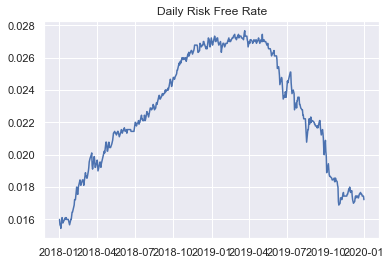

In [16]:
#plotting the graph for daily risk free rate
plt.plot(risk_free)
plt.title('Daily Risk Free Rate')
plt.show()

#### IInterpretation : The risk free rate increases steadily from 2018 to 2019, in early 2019 it stabilises for a short duration, and then the risk free rate steadily decreases until 2020.

In [17]:
stocks = port.columns
for i in stocks:
    returns[f"excess_return_{i}"] = returns[i] - risk_free

In [18]:
returns.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,excess_return_XEL,excess_return_XOM,excess_return_XRAY,excess_return_XYL,excess_return_YUM,excess_return_ZBH,excess_return_ZBRA,excess_return_ZION,excess_return_ZTS,excess_return_GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,0.025444,-0.012266,0.009049,-0.000174,0.015649,0.003722,0.002211,0.000906,0.004615,0.018796,...,-0.022360,0.003973,-0.019092,-0.003473,-0.016525,-0.008735,0.004196,-0.016850,-0.011069,-0.009268
2018-01-04,-0.007501,0.006305,0.036899,0.004645,-0.005703,-0.002225,-0.001697,0.003734,0.011841,0.012042,...,-0.023458,-0.014283,-0.015816,-0.008990,-0.005486,-0.017108,0.004093,-0.011520,-0.009703,-0.011638
2018-01-05,0.015988,-0.000380,0.010631,0.011385,0.017408,0.012104,0.002890,-0.003945,0.008249,0.011571,...,-0.022448,-0.016251,-0.001394,-0.017319,-0.009616,-0.005504,0.000131,-0.015051,-0.004001,-0.008411
2018-01-08,0.002146,-0.009877,-0.007042,-0.003714,-0.016022,0.016576,-0.002882,0.000113,0.007991,-0.001619,...,-0.008631,-0.011615,-0.009330,-0.012500,-0.014421,-0.014206,-0.006160,-0.021026,-0.004116,-0.014449


In [19]:
returns.describe()

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,excess_return_XEL,excess_return_XOM,excess_return_XRAY,excess_return_XYL,excess_return_YUM,excess_return_ZBH,excess_return_ZBRA,excess_return_ZION,excess_return_ZTS,excess_return_GSPC
count,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,...,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000
mean,0.000597,-0.000937,0.000989,0.001214,-0.000010,-0.000035,0.000866,0.000819,0.000708,0.001413,...,-0.022092,-0.022968,-0.022768,-0.022105,-0.022138,-0.022088,-0.020460,-0.022499,-0.021268,-0.022212
std,0.016258,0.023855,0.018382,0.017355,0.019854,0.018173,0.013310,0.011739,0.012859,0.019019,...,0.010510,0.013295,0.018256,0.015798,0.011454,0.014712,0.025151,0.016534,0.014485,0.010139
min,-0.110117,-0.091229,-0.075110,-0.099607,-0.162524,-0.073877,-0.047982,-0.059009,-0.072826,-0.080372,...,-0.072409,-0.073681,-0.209305,-0.104787,-0.094775,-0.083359,-0.104079,-0.079668,-0.066350,-0.059254
25%,-0.006776,-0.013429,-0.008190,-0.006829,-0.008272,-0.010035,-0.005540,-0.005957,-0.004990,-0.007307,...,-0.028136,-0.031234,-0.030125,-0.030421,-0.028247,-0.029678,-0.032090,-0.032464,-0.029176,-0.027269
50%,0.001586,-0.001041,0.000712,0.001608,0.001128,0.001556,0.001480,0.001271,0.001593,0.001994,...,-0.022208,-0.022331,-0.021771,-0.021059,-0.021732,-0.022310,-0.021009,-0.021242,-0.021068,-0.021492
75%,0.009524,0.012887,0.010733,0.010161,0.009833,0.011177,0.008953,0.007414,0.008079,0.011461,...,-0.015474,-0.014583,-0.013775,-0.011931,-0.015760,-0.013645,-0.010323,-0.011994,-0.013508,-0.016315
max,0.078422,0.086474,0.105711,0.070422,0.137673,0.093013,0.061928,0.045161,0.058967,0.095206,...,0.008377,0.020668,0.149374,0.070690,0.022227,0.061910,0.149253,0.034437,0.053619,0.022483


In [20]:
#returns = returns.dropna()
returns = returns.dropna(how='all')

In [21]:
returns

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,excess_return_XEL,excess_return_XOM,excess_return_XRAY,excess_return_XYL,excess_return_YUM,excess_return_ZBH,excess_return_ZBRA,excess_return_ZION,excess_return_ZTS,excess_return_GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-03,0.025444,-0.012266,0.009049,-0.000174,0.015649,0.003722,0.002211,0.000906,0.004615,0.018796,...,-0.022360,0.003973,-0.019092,-0.003473,-0.016525,-0.008735,0.004196,-0.016850,-0.011069,-0.009268
2018-01-04,-0.007501,0.006305,0.036899,0.004645,-0.005703,-0.002225,-0.001697,0.003734,0.011841,0.012042,...,-0.023458,-0.014283,-0.015816,-0.008990,-0.005486,-0.017108,0.004093,-0.011520,-0.009703,-0.011638
2018-01-05,0.015988,-0.000380,0.010631,0.011385,0.017408,0.012104,0.002890,-0.003945,0.008249,0.011571,...,-0.022448,-0.016251,-0.001394,-0.017319,-0.009616,-0.005504,0.000131,-0.015051,-0.004001,-0.008411
2018-01-08,0.002146,-0.009877,-0.007042,-0.003714,-0.016022,0.016576,-0.002882,0.000113,0.007991,-0.001619,...,-0.008631,-0.011615,-0.009330,-0.012500,-0.014421,-0.014206,-0.006160,-0.021026,-0.004116,-0.014449
2018-01-09,0.024554,-0.000959,-0.008080,-0.000115,0.007538,0.006398,0.001700,-0.012900,0.003335,0.008971,...,-0.027667,-0.020246,-0.057728,-0.015712,-0.018651,-0.032083,0.014643,0.007509,-0.004281,-0.014697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,0.000469,-0.004096,0.003751,0.000951,-0.004432,-0.002103,-0.000801,-0.001426,0.003700,0.002098,...,-0.020094,-0.021397,-0.017031,-0.021482,-0.012346,-0.020002,-0.026904,-0.013855,-0.013401,-0.017751
2019-12-26,0.001758,0.016792,-0.008096,0.019840,-0.000223,-0.004331,0.000000,0.004047,0.002079,0.004732,...,-0.018669,-0.015985,-0.029442,-0.018064,-0.003004,-0.021334,-0.017202,-0.015033,-0.016728,-0.012427
2019-12-27,-0.000351,-0.041456,-0.005776,-0.000379,-0.007013,-0.001646,0.001375,0.009009,0.000802,-0.001238,...,-0.012189,-0.020867,-0.011961,-0.014391,-0.016364,-0.019374,-0.011234,-0.020542,-0.015791,-0.017410


In [22]:
import statsmodels.api as sm

In [23]:
returns.isnull().sum()

A                     0
AAL                   0
AAP                   0
AAPL                  0
ABBV                  0
                     ..
excess_return_ZBH     4
excess_return_ZBRA    4
excess_return_ZION    4
excess_return_ZTS     4
excess_return_GSPC    4
Length: 1006, dtype: int64

In [24]:
returns = returns.set_index(['A'])
returns = returns.fillna(method='ffill')

In [25]:
df = pd.DataFrame(columns=['Symbol', 'Beta_Coef'])
for s in stocks:
    stock_excess_return = 'excess_return_' + str(s)
    y = returns[stock_excess_return]
    X = returns['excess_return_GSPC'] #market index return
    X = sm.add_constant(X, prepend=False)
    capm = sm.OLS(y, X)# OLS stands for Ordinary Least Square (OLS)
    capm_result = capm.fit()
    print("beta value for stock " +str(s)+ " is " +str(capm_result.params[0])) #this considers only the Beta coeff. value.
    df2 = {'Symbol': s, 'Beta_Coef': capm_result.params[0]}
    df = df.append(df2, ignore_index = True)
print(df)


beta value for stock A is 1.1385121542644332
beta value for stock AAL is 1.3669982522732693
beta value for stock AAP is 0.8060797089865225
beta value for stock AAPL is 1.3335389065811976
beta value for stock ABBV is 1.1059985928077785
beta value for stock ABC is 0.9089438969738152
beta value for stock ABT is 1.0171251160799362
beta value for stock ACGL is 0.7131294338893787
beta value for stock ACN is 1.0571895300538443
beta value for stock ADBE is 1.4499296084019848
beta value for stock ADI is 1.236696331422487
beta value for stock ADM is 0.8299583876244258
beta value for stock ADP is 1.025992223542879
beta value for stock ADSK is 1.5271094400155452
beta value for stock AEE is 0.31655869095953704
beta value for stock AEP is 0.21833929392097268
beta value for stock AES is 0.6772241144510863
beta value for stock AFL is 0.7336134842875107
beta value for stock AIG is 0.8493959784735879
beta value for stock AIZ is 0.7846382402763407
beta value for stock AJG is 0.8034748786945595
beta value

beta value for stock FISV is 0.9231494625454021
beta value for stock FITB is 0.9724758639499087
beta value for stock FLT is 0.9482592601177644
beta value for stock FMC is 1.0775224457455106
beta value for stock FOX is nan
beta value for stock FOXA is nan
beta value for stock FRC is 0.9086630958846998
beta value for stock FRT is 0.5208384700293465
beta value for stock FSLR is 1.1843760840256203
beta value for stock FTNT is 1.2529921397327002
beta value for stock FTV is 1.0800412013391445
beta value for stock GD is 0.9294601877347076
beta value for stock GE is 1.0122470201524856
beta value for stock GEHC is nan
beta value for stock GEN is 1.0351216395657572
beta value for stock GILD is 0.9735481712961636
beta value for stock GIS is 0.42736981058248646
beta value for stock GL is 0.9250506740866203
beta value for stock GLW is 1.2230322517840275
beta value for stock GM is 1.0151181300412957
beta value for stock GNRC is 1.0716091333347537
beta value for stock GOOG is 1.296227990762291
beta v

beta value for stock POOL is 0.7781432145109815
beta value for stock PPG is 0.8986742751308319
beta value for stock PPL is 0.39851546215628353
beta value for stock PRU is 1.192561849397606
beta value for stock PSA is 0.2761958950320599
beta value for stock PSX is 0.9787725430115156
beta value for stock PTC is 1.364631142170037
beta value for stock PWR is 1.0686562750813577
beta value for stock PXD is 1.2424766914698708
beta value for stock PYPL is 1.290593969320855
beta value for stock QCOM is 1.1418054537741522
beta value for stock QRVO is 1.4390905603413873
beta value for stock RCL is 1.1763892422769393
beta value for stock RE is 0.5926185127685831
beta value for stock REG is 0.5203940810024809
beta value for stock REGN is 1.0824254108392652
beta value for stock RF is 1.1137921522253658
beta value for stock RHI is 1.2759725496796581
beta value for stock RJF is 1.2522152288267236
beta value for stock RL is 1.1629134484295232
beta value for stock RMD is 0.9191687626987893
beta value fo

In [26]:
print(df)

    Symbol  Beta_Coef
0        A   1.138512
1      AAL   1.366998
2      AAP   0.806080
3     AAPL   1.333539
4     ABBV   1.105999
..     ...        ...
498    ZBH   0.931497
499   ZBRA   1.371882
500   ZION   1.034538
501    ZTS   0.993426
502   GSPC   1.000000

[503 rows x 2 columns]


#### The stocks with the lowest beta coefficient from CAPM are:

In [27]:
df.nsmallest(10, 'Beta_Coef')

,Symbol,Beta_Coef
328,NEM,0.202409
15,AEP,0.218339
143,DUK,0.236676
415,SO,0.240368
480,WEC,0.243103
151,ED,0.251750
493,XEL,0.254182
102,CMS,0.256998
142,DTE,0.257189
167,ETR,0.261223


#### The stocks with the largest beta coefficient from CAPM are:

In [28]:
df.nlargest(10, 'Beta_Coef')

,Symbol,Beta_Coef
339,NVDA,1.948727
28,AMD,1.905602
323,MU,1.814820
462,URI,1.749767
350,ON,1.702109
329,NFLX,1.656763
23,ALGN,1.586979
281,LRCX,1.566177
312,MPWR,1.553853
26,AMAT,1.551390


In [29]:
data.head() #original list of S&P500 stocks loaded in intial step.

,Symbol,Name,Sector
0,MMM,3M,Industrial Conglomerates
1,AOS,A. O. Smith,Building Products
2,ABT,Abbott,Health Care Equipment
3,ABBV,AbbVie,Pharmaceuticals
4,ACN,Accenture,IT Consulting & Other Services


### Merging the list of stocks and names with the generated Beta cofficients:

In [30]:
dff = pd.merge(data, df, on='Symbol')

In [31]:
dff

,Symbol,Name,Sector,Beta_Coef
0,MMM,3M,Industrial Conglomerates,1.139224
1,AOS,A. O. Smith,Building Products,1.064619
2,ABT,Abbott,Health Care Equipment,1.017125
3,ABBV,AbbVie,Pharmaceuticals,1.105999
4,ACN,Accenture,IT Consulting & Other Services,1.057190
...,...,...,...,...
497,YUM,Yum! Brands,Restaurants,0.644432
498,ZBRA,Zebra Technologies,Electronic Equipment & Instruments,1.371882
499,ZBH,Zimmer Biomet,Health Care Equipment,0.931497
500,ZION,Zions Bancorporation,Regional Banks,1.034538


### Sorting the dataframe based on the sector and Beta Coefficients. This step helps to identify the stocks that are most under-valued in each sector.

In [32]:
#print('SORTED DATAFRAME')
dfsf = dff.sort_values(by = ['Sector', 'Beta_Coef'], ascending = [True, True], na_position = 'first')
dfsf

,Symbol,Name,Sector,Beta_Coef
354,OMC,Omnicom Group,Advertising,0.718374
254,IPG,Interpublic Group of Companies (The),Advertising,0.888489
280,LHX,L3Harris,Aerospace & Defense,0.649478
344,NOC,Northrop Grumman,Aerospace & Defense,0.767226
291,LMT,Lockheed Martin,Aerospace & Defense,0.785550
...,...,...,...,...
463,URI,United Rentals,Trading Companies & Distributors,1.749767
261,JBHT,J.B. Hunt,Trucking,0.966755
353,ODFL,Old Dominion,Trucking,1.163811
33,AWK,American Water Works,Water Utilities,0.326871


#### The entire resultant data of S&P500 stocks and Beta values are saved to an external csv file.

In [33]:
dfsf.to_csv('3year_beta_capm.csv')

## Phase 2: Portfolio Optimisation:

### For the porpose of a diversified portfolio, we select 12 stocks from the S&P500 Index, that are from 12 different sectors and are most undervalued in their respective sectors.

#### The stocks and sectors are mentioned as:
TJX Companies (Apparel Retail) 

American Electric Company (Electric Utilities)

Brown and Brown (Insurance)

Aflac (Life &n health insurance)

Chevron (Oil and gas)

Ford Motors (Automobile)

Jack Henry and Associates (Data Processing/ Outsourcing)

Southwest (Airlines)

McKesson (Healthcare)

Motorola (Communications/ Equipment)

Vici Properties (Hotels/ Hospitality)

Wallmart (Hyper/Supermarkets)
    


In [34]:
stocks=['TJX','LUV','F','MSI','JKHY','AEP','MCK','VICI','WMT','BRO','CVX','AFL'] #symbols of stocks mentioned above.
start=datetime.datetime(2018,1,1)
end=datetime.datetime(2020,1,1)
fds=yf.download(stocks,start=start, end=end,interval='1d')['Close']

[*********************100%***********************]  12 of 12 completed


In [35]:
fds

,AEP,AFL,BRO,CVX,F,JKHY,LUV,MCK,MSI,TJX,VICI,WMT
Date,,,,,,,,,,,,
2018-01-02,72.410004,43.985001,25.540001,127.580002,12.66,116.190002,66.290001,159.000000,90.550003,38.345001,20.100000,98.589996
2018-01-03,71.800003,44.115002,25.830000,128.509995,12.76,116.339996,64.910004,156.759995,89.910004,37.654999,20.160000,99.449997
2018-01-04,70.949997,44.570000,25.900000,128.110001,12.98,118.639999,64.699997,155.059998,90.660004,37.715000,20.200001,99.540001
2018-01-05,70.800003,44.865002,26.145000,127.900002,13.20,119.779999,64.320000,157.160004,91.879997,38.575001,20.200001,100.129997
2018-01-08,71.419998,44.980000,26.065001,128.529999,13.15,119.820000,64.000000,159.149994,92.820000,37.825001,20.200001,101.610001
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,93.839996,52.759998,39.169998,120.339996,9.47,146.419998,54.939999,138.809998,161.679993,60.380001,25.200001,119.510002
2019-12-26,93.879997,52.619999,39.369999,120.599998,9.45,146.110001,54.900002,139.309998,161.380005,60.820000,25.030001,119.519997
2019-12-27,94.190002,52.619999,39.299999,120.300003,9.36,146.610001,54.320000,139.440002,161.449997,60.849998,25.240000,119.589996


#### Check the performance of stock over span of 2 years from 2018 to 2020.

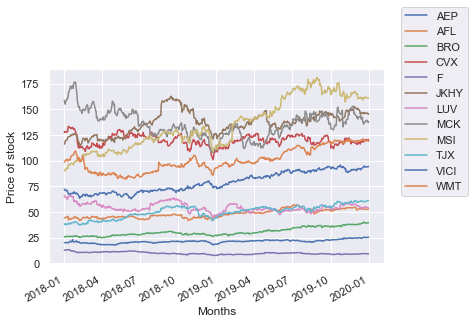

In [36]:
fds.plot()
plt.xlabel("Months")
plt.ylabel("Price of stock")
plt.legend(loc=(1.05,0.35))
plt.show()

In [37]:
# check daily returns of stock

rt=fds.pct_change()

In [38]:
rt.dropna(inplace=True)
rt.head()

,AEP,AFL,BRO,CVX,F,JKHY,LUV,MCK,MSI,TJX,VICI,WMT
Date,,,,,,,,,,,,
2018-01-03,-0.008424,0.002956,0.011355,0.007289,0.007899,0.001291,-0.020818,-0.014088,-0.007068,-0.017995,0.002985,0.008723
2018-01-04,-0.011839,0.010314,0.002710,-0.003113,0.017241,0.019770,-0.003235,-0.010845,0.008342,0.001593,0.001984,0.000905
2018-01-05,-0.002114,0.006619,0.009459,-0.001639,0.016949,0.009609,-0.005873,0.013543,0.013457,0.022803,0.000000,0.005927
2018-01-08,0.008757,0.002563,-0.003060,0.004926,-0.003788,0.000334,-0.004975,0.012662,0.010231,-0.019443,0.000000,0.014781
2018-01-09,-0.011761,0.000445,0.008057,-0.005368,-0.005323,0.010015,-0.025312,0.009362,-0.007541,-0.001983,0.000495,-0.012007


In [39]:
# annualized returns os stocks

rt_annualized=rt*(252) 

In [40]:
rt_annualized.head()

,AEP,AFL,BRO,CVX,F,JKHY,LUV,MCK,MSI,TJX,VICI,WMT
Date,,,,,,,,,,,,
2018-01-03,-2.122913,0.744805,2.861384,1.836951,1.990529,0.325316,-5.246030,-3.550197,-1.781114,-4.534636,0.752232,2.198196
2018-01-04,-2.983308,2.599105,0.682924,-0.784363,4.344814,4.981956,-0.815309,-2.732835,2.102102,0.401550,0.500011,0.228064
2018-01-05,-0.532748,1.667949,2.383792,-0.413081,4.271192,2.421442,-1.480051,3.412882,3.391114,5.746259,0.000000,1.493662
2018-01-08,2.206762,0.645926,-0.771084,1.241277,-0.954549,0.084156,-1.253730,3.190873,2.578152,-4.899546,0.000000,3.724766
2018-01-09,-2.963863,0.112052,2.030300,-1.352841,-1.341439,2.523779,-6.378746,2.359292,-1.900444,-0.499675,0.124732,-3.025689


In [41]:
# calculating Standard Deviation of the stocks

sd=rt.std()

In [42]:
sd

AEP     0.009871
AFL     0.011213
BRO     0.010522
CVX     0.013538
F       0.017440
JKHY    0.011698
LUV     0.016073
MCK     0.017395
MSI     0.014562
TJX     0.013280
VICI    0.012816
WMT     0.012479
dtype: float64

In [43]:
# calculating annualized Standard deviation of the stocks

sd_annualized=sd*np.sqrt(252)

In [44]:
sd_annualized

AEP     0.156697
AFL     0.177996
BRO     0.167028
CVX     0.214904
F       0.276857
JKHY    0.185695
LUV     0.255151
MCK     0.276134
MSI     0.231165
TJX     0.210819
VICI    0.203453
WMT     0.198097
dtype: float64

In [45]:
#The risk free considered to be 0.01 here

risk_free=0.01

In [46]:
rt.corr() #calculate correlation between the stocks.

,AEP,AFL,BRO,CVX,F,JKHY,LUV,MCK,MSI,TJX,VICI,WMT
AEP,1.000000,0.214698,0.222205,-0.001397,-0.071185,0.137788,0.098946,0.056678,0.129081,0.056235,0.211467,0.247002
AFL,0.214698,1.000000,0.509154,0.412829,0.262831,0.369741,0.353380,0.276854,0.275890,0.283335,0.232161,0.389594
BRO,0.222205,0.509154,1.000000,0.341681,0.300846,0.489511,0.320179,0.264455,0.386535,0.383790,0.241875,0.336075
CVX,-0.001397,0.412829,0.341681,1.000000,0.365715,0.360929,0.292210,0.276686,0.234700,0.326085,0.159130,0.298227
F,-0.071185,0.262831,0.300846,0.365715,1.000000,0.213419,0.167721,0.292683,0.223005,0.314520,0.170407,0.179846
JKHY,0.137788,0.369741,0.489511,0.360929,0.213419,1.000000,0.325253,0.183730,0.421061,0.382427,0.175798,0.325442
LUV,0.098946,0.353380,0.320179,0.292210,0.167721,0.325253,1.000000,0.180118,0.263043,0.284544,0.168476,0.243025
MCK,0.056678,0.276854,0.264455,0.276686,0.292683,0.183730,0.180118,1.000000,0.184752,0.180736,0.201220,0.219695
MSI,0.129081,0.275890,0.386535,0.234700,0.223005,0.421061,0.263043,0.184752,1.000000,0.319021,0.208728,0.230392
TJX,0.056235,0.283335,0.383790,0.326085,0.314520,0.382427,0.284544,0.180736,0.319021,1.000000,0.146957,0.349323


In [47]:
# defining a function to caluculate the sharpe ratios

def sharpe(stocks, rf, n_assets):
    sr={}
    for i, j in zip(stocks, range(n_assets)):
        sr[i] = rt.iloc[:, j].mean() - rf / np.std(rt.iloc[:, j]) 
    return sr

In [48]:
st=rt.columns[:13]

In [49]:
sr=sharpe(st,risk_free,12)

In [50]:
sr

{'AEP': -1.0134997743211922,
 'AFL': -0.8923061657821266,
 'BRO': -0.9504346131063265,
 'CVX': -0.7394373754251417,
 'F': -0.5744183512060589,
 'JKHY': -0.8552034480324217,
 'LUV': -0.6230628427952768,
 'MCK': -0.5755835346552137,
 'MSI': -0.6861508074753682,
 'TJX': -0.7527272561548184,
 'VICI': -0.7804729258264804,
 'WMT': -0.8016976009434915}

In [51]:
#Printing max Sharpe ratio:
print(max(sr, key=sr.get))
print(max(sr.values()))

F
-0.5744183512060589


In [52]:
#Printing min Sharpe ratio:
print(min(sr, key=sr.get))
print(min(sr.values()))

AEP
-1.0134997743211922


In [53]:
# importing required packages for our work

from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting

In [54]:
# Calculate the expected returns and the annualized sample covariance matrix of asset returns

mu=expected_returns.mean_historical_return(fds)

S=risk_models.sample_cov(fds)

# Optimize for maximum sharpe ratio

ef=EfficientFrontier(mu,S)

ef.add_constraint(lambda w: w[0]+w[1]+w[2]+w[3]+w[4]+w[5]+w[6]+w[7]+w[8]+w[9]+w[10]+w[11]== 1) #12 portfolio weights for 12 stocks.

weights=ef.max_sharpe()

cl_wts=ef.clean_weights() 

print(cl_wts)

ef.portfolio_performance(verbose=True)

OrderedDict([('AEP', 0.2292), ('AFL', 0.0), ('BRO', 0.29632), ('CVX', 0.0), ('F', 0.0), ('JKHY', 0.0), ('LUV', 0.0), ('MCK', 0.0), ('MSI', 0.26863), ('TJX', 0.20585), ('VICI', 0.0), ('WMT', 0.0)])
Expected annual return: 24.9%
Annual volatility: 12.9%
Sharpe Ratio: 1.77


(0.24949463142640863, 0.129476524541327, 1.7724806271978466)

#### The ideal portfolio includes 4 stocks AEP, BRO, MSI and TJX. From the sectors electric utilities, Insurance, Communications and Apparel retail.
AEP consists of 22.9% of the portfolio

TJX consists of 20.5% of portfolio

BRO consists of 29.6% of the portfolio

MSI consists of 26.8% of the portfolio

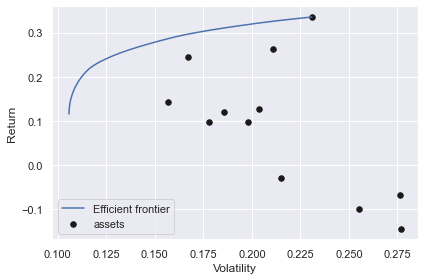

In [55]:
mu=expected_returns.mean_historical_return(fds)
S=risk_models.sample_cov(fds)

# Optimize for maximum sharpe ratio

ef = EfficientFrontier(mu,S)
ef.add_constraint(lambda w: w[0]+w[1]+w[2]+w[3]+w[4]+w[5]+w[6]+w[7]+w[8]+w[9]+w[10]+w[11]== 1)
fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)
plt.show()

#### Interpretation: The highest retunring portfolio, gives a return of around 33% with volatiality, of .23 approximately.
#### Yes, the volatility of the portfolio is also on a higher side, but an annual returns of over .3 is very high.
#### the closest alternate portfolio has volatility of .16 approx. and gives returns of around 24%.
#### All remaining portfolios fail to deliver returns of this order for equal/lower risk.


In [56]:
#function to calculate the growth of stock over a period of given time: 

def calculate_growth_of_stock(stock_symbol, start_date, end_date):
    # Downloading data for the stock using yfinance
    stock = yf.Ticker(stock_symbol)
    history = stock.history(start=start_date, end=end_date)

    # Calculate the percentage change in stock price between the start and end dates
    start_price_stock = history.iloc[0]['Close']
    end_price_stock = history.iloc[-1]['Close']
    growth_stock = (end_price_stock - start_price_stock) / start_price_stock * 100

    # Print the percentage growth of stock
    print("The calculated % growth of {} between {} and {}: {:.2f}%".format(stock_symbol, start_date, end_date, growth_stock))
    #print(price_start)
    #print(price_end)
    return growth_stock


In [57]:
a = calculate_growth_of_stock('AEP', '2020-01-01', '2023-01-01')

The calculated % growth of AEP between 2020-01-01 and 2023-01-01: 9.63%


In [58]:
b= calculate_growth_of_stock('BRO', '2020-01-01', '2023-01-01')


The calculated % growth of BRO between 2020-01-01 and 2023-01-01: 46.27%


In [59]:
c= calculate_growth_of_stock('MSI', '2020-01-01', '2023-01-01')


The calculated % growth of MSI between 2020-01-01 and 2023-01-01: 64.36%


In [60]:
d= calculate_growth_of_stock('TJX', '2020-01-01', '2023-01-01')


The calculated % growth of TJX between 2020-01-01 and 2023-01-01: 31.90%


### Research question:
#### If a person invests 10000$ just before the pandemic in January 2020 in the optimal portfolio that was generated based on stocks and market data between 2018 and 2020, how would the portfolio perform in 2023, considering the effects of the COVID-19 pandemic, the Russia-Ukraine war and the recent economic slowdown ? 

In [61]:
investment = 10000
#a,b,c,d represents growth os stock from 2020 (date of investment) to 2023
portfolio_gain = investment*(((a*0.2292)/100)+((b*0.29632)/100)+((c*0.26863)/100)+((d*.020585)/100)) 

In [62]:
portfolio_gain

3386.3482815611496

#### The value of portfolio incresed by 3539$ as on January-01-2023

In [63]:
current_portfolio_value = investment + portfolio_gain
current_portfolio_value
    

13386.34828156115

#### The current value of portfolio is 13,539 $

In [64]:
three_year_gain = ((current_portfolio_value-investment)/investment)*100
three_year_gain

33.8634828156115

#### The value of portfolio increased by 35% over the span of 3 years.

In [65]:
d= calculate_growth_of_stock('^GSPC', '2020-01-01', '2023-01-01')


The calculated % growth of ^GSPC between 2020-01-01 and 2023-01-01: 17.85%


#### During the same period, the value of market index S&P500 increased by 17.8%

### RESULTS: From the result above, we can infer that, the portfolio that was created using the Capital Asset Pricing Model and Portfolio Optimisation gave twice the returns in comparision to the market Index, despite the influcence and effects of external factors.

### However, it is important to note that the expected annual returns of 24% based on the portfolio optimisation was not met, the portfolio gave approximately half the returns that was expected annualy. Which is still much higher than the performance of the market index as a reference.

#### Therefore CAPM and Portfolio optimisation could be very effective in builing an ideal portfolio.

#### References: Class notes/notebook. 

"CAPM_blank.ipynb" , "Portfolio Theory and Its Application in Python_blank-Copy1"

https://pyportfolioopt.readthedocs.io/en/latest/UserGuide.html

##### External data for list of S&P500 companies, along with their sector names : https://github.com/datasets/s-and-p-500-companies/blob/main/data/constituents.csv
